# Exploratory Machine Learning

In [139]:
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.cross_validation import KFold
from sklearn import linear_model
from scipy.stats import pearsonr

import matplotlib.pyplot as plt

In [141]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          #,'text.usetex': False
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
}
plt.rcParams.update(params)

In [4]:
df_feats = pd.read_csv('table.csv')
df_rates = pd.read_csv('table_pred.csv')

# df_counties= df_feats['county']

Remove county column

In [5]:
# df_feats.drop('county',axis=1,inplace=True)

Remove children column

In [6]:
df_feats.drop('Children',axis=1,inplace=True)

Remove rows with NaN values

In [7]:
inds= pd.isnull(df_feats).any(1).nonzero()[0]
print inds

[12 16 20 23 24 50 55]


In [8]:
df_feats.iloc[inds]

,county,0-4,5-17,18-64,65+,total,Asian (%),Black (%),Hispanic (%),White (%),...,Medi-Cal (%),Private (%),Other (%).1,Adults,All,Population near busy roads (%),Year,Average AQI,Maximum AQI,IQR AQI
12,Inyo,954,2635,11232,3834,18656,1.4,0.6,20.8,64.7,...,47.83,29.35,6.52,27682.20,22372.25,8.4,2015,62.64,1383.0,32.0
16,Lassen,1406,4113,24387,4012,33918,1.5,9.1,16.3,67.5,...,39.81,24.27,17.48,20799.37,17775.13,6.0,2015,NaN,NaN,NaN
20,Mariposa,723,2244,10640,4337,17944,1.2,0.6,10.1,82.3,...,16.67,36.67,6.67,23651.71,21923.75,0.0,2015,52.91,215.0,23.0
23,Modoc,466,1439,5456,2154,9515,0.5,0.7,14.6,79.0,...,53.33,21.67,15.00,8379.63,8379.63,0.0,2015,NaN,NaN,NaN
24,Mono,857,2189,9801,1658,14505,1.1,0.3,28.3,67.1,...,44.90,24.49,24.49,41523.20,37135.17,11.9,2015,63.88,3994.0,18.0
50,Trinity,553,1662,8079,3180,13475,1.7,0.3,8.7,81.0,...,14.29,28.57,0.00,10175.00,11997.00,0.0,2015,11.01,49.0,10.2
55,Yuba,5934,14672,45426,8591,74624,6.5,2.9,25.2,58.9,...,54.49,12.69,16.72,35292.89,33145.75,27.9,2015,NaN,NaN,NaN


Drop Lassen, Modoc & Yuba counties

In [9]:
inds= inds[[1,3,6]]
inds

array([16, 23, 55])

In [10]:
df_feats['county'].iloc[inds]

16    Lassen
23     Modoc
55      Yuba
Name: county, dtype: object

In [11]:
df_feats.drop(inds,axis=0,inplace=True)
df_rates.drop(inds,axis=0,inplace=True)
# df_counties.drop(inds,axis=0,inplace=True)

Check for columns with NaNs

In [12]:
inds= pd.isnull(df_feats).any(0).nonzero()[0]
print inds

[14]


In [13]:
print df_feats[inds].columns[0]

Federal poverty (%)


In [14]:
df_feats.drop('Federal poverty (%)',axis=1,inplace=True)

In [15]:
if len(df_feats.isnull().any(1).nonzero()[0])==0:
    print 'No more NaN in features table'

No more NaN in features table


Eliminate counties with no ER asthma rates

In [16]:
inds= pd.isnull(df_rates).any(1).nonzero()[0]

df_rates.iloc[inds]

,County,Number of ER visits,Rate of ER visits
20,Mariposa,10,NaN
50,Trinity,7,NaN


In [17]:
df_feats.drop(df_feats.index[inds], axis=0, inplace=True)
df_rates.drop(df_rates.index[inds], axis=0, inplace=True)

In [18]:
if len(df_rates.isnull().any(1).nonzero()[0])==0:
    print 'No more NaN in rates table'

No more NaN in rates table


Remove county column

In [19]:
df_feats.drop('county',axis=1,inplace=True)

### Linear Regression model

Based on the notebook for the Programming Machine Learning Applications course, present on http://facweb.cs.depaul.edu/mobasher/classes/csc478/Notes/IPython%20Notebook%20-%20Regression.html

In [20]:
linreg = linear_model.LinearRegression()

In [21]:
# from sklearn.preprocessing import StandardScaler
# df_X= StandardScaler(df_feats)

# df_X.transform(df_feats)

Train the Linear Regression Model

In [22]:
y_real= df_rates['Rate of ER visits']
linreg.fit(df_feats,y_real)
# linreg.fit(df_feats,df_rates['Number of ER visits'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
y_predict= linreg.predict(df_feats)

err = abs(y_predict - y_real)
total_error = np.dot(err,err)

RMSE_train = np.sqrt(total_error/len(y_predict))
print RMSE_train

11.9508181839


In [24]:
R2= linreg.score(df_feats,y_real)

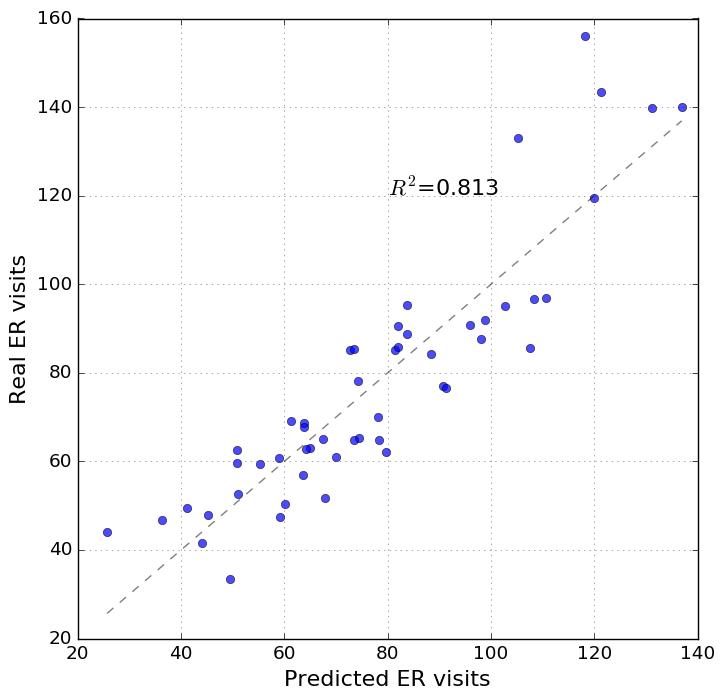

In [32]:
plt.figure(figsize=(8,8))

plt.plot(y_predict, y_real,'bo',alpha=0.7)
z= np.linspace(np.min(y_predict), np.max(y_predict),10)
plt.plot(z, z,'k--',alpha=0.5)
plt.xlabel('Predicted ER visits')
plt.ylabel('Real ER visits')

line= r'$R^2$=%.3f' % R2
plt.text(80,120,line)

plt.savefig('LinearRegression_TrainingSet.png')

Regression coefficients

In [33]:
print linreg.coef_

[ -9.77694677e-01  -9.78996305e-01  -9.78722126e-01  -9.78315191e-01
   9.78646339e-01   1.53763980e+01   2.07298594e+01   1.64273572e+01
   1.54748425e+01   1.65971680e+01   1.72571312e+00  -7.50587716e-01
  -2.96318716e-01   2.20163272e-01   5.35811203e+02   5.35345760e+02
   5.35335352e+02   5.33539450e+02   7.97484221e-04  -1.27698491e-03
  -5.57626402e-02   2.98427949e-12  -2.60486772e-01   5.22547377e-03
   5.67525835e-01]


Data is still not normalized

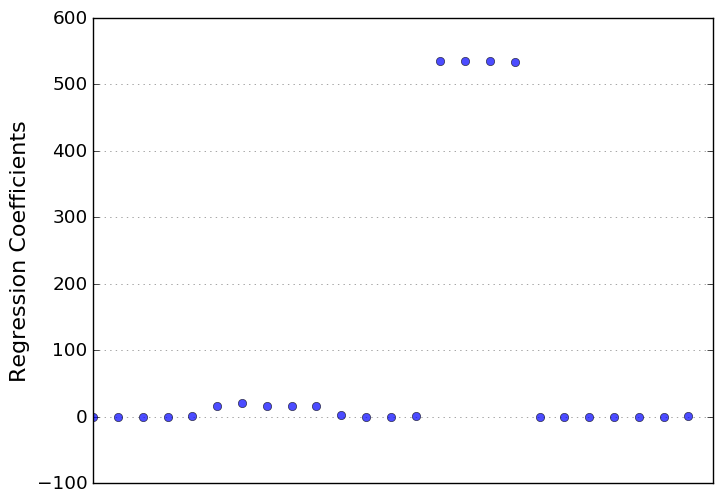

In [34]:
plt.plot(linreg.coef_,'bo',alpha=0.7)
plt.ylabel('Regression Coefficients')
plt.xticks([])
plt.grid(axis='x')

plt.savefig('LinearRegression_TrainingSet_coeff.png')

Use 5-fold cross-validation

In [94]:
kf = KFold(len(df_feats.columns), n_folds=5, shuffle=True)

z_predict=[]
z_real=[]
crossval_err = 0
for train,test in kf:
    linreg.fit(df_feats.iloc[train],y_real.iloc[train])

    y_predict = linreg.predict(df_feats.iloc[test])
    z_predict.append(y_predict)
    z_real.append(y_real.iloc[test])
    
    err = np.abs(y_predict - y_real.iloc[test])
    crossval_err += np.dot(err,err)
    
RMSE_5CV = np.sqrt(crossval_err/len(df_feats.columns))

In [95]:
print 'Simple Linear Regression'
print('RMSE on training: %.4f' % RMSE_train)
print('RMSE on 5-fold CV: %.4f' % RMSE_5CV)

Simple Linear Regression
RMSE on training: 11.9508
RMSE on 5-fold CV: 113.2914


In [96]:
z_predict= np.concatenate(z_predict)
z_real= np.concatenate(z_real)

In [97]:
from scipy.stats import pearsonr

r,p = pearsonr(z_predict,z_real)

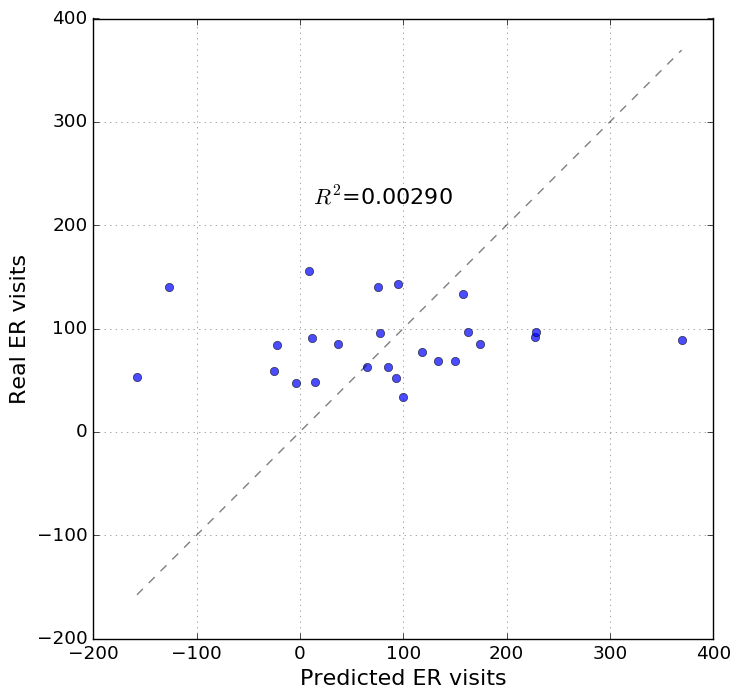

In [101]:
plt.figure(figsize=(8,8))

plt.plot(z_predict, z_real,'bo',alpha=0.7)
z= np.linspace(np.min(z_predict), np.max(z_predict),10)
plt.plot(z, z,'k--',alpha=0.5)
plt.xlabel('Predicted ER visits')
plt.ylabel('Real ER visits')


line= r'$R^2$=%.5f' % (r**2)
plt.text(80,220,line,ha='center')

plt.savefig('LinearRegression_CrossValidation.png')

### Ridge Regression model

In [163]:
ridgereg = linear_model.Ridge(fit_intercept=True, alpha=0.5)

Train the Ridge Regression Model

In [164]:
ridgereg.fit(df_feats,y_real)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [165]:
y_predict= ridgereg.predict(df_feats)

err = abs(y_predict - y_real)
total_error = np.dot(err,err)

RMSE_train = np.sqrt(total_error/len(y_predict))
print RMSE_train

12.1823033074


In [166]:
R2= ridgereg.score(df_feats,y_real)

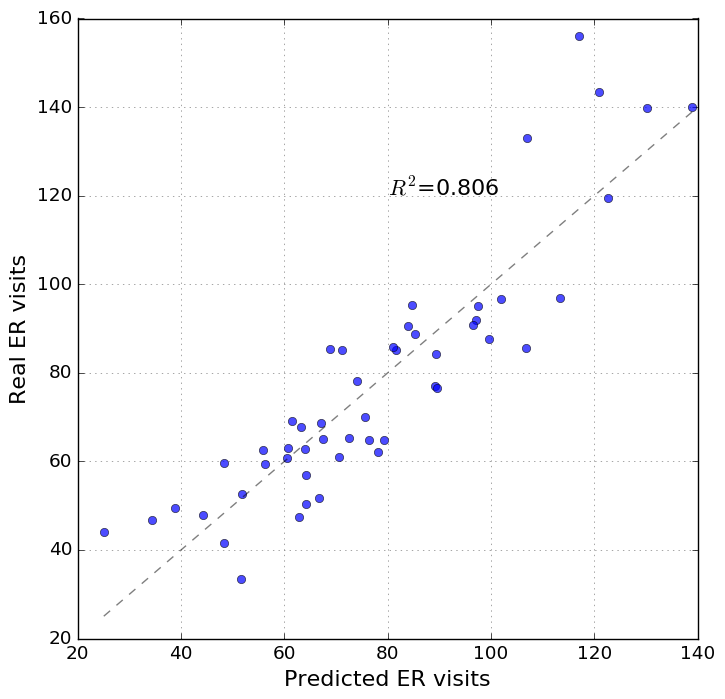

In [167]:
plt.figure(figsize=(8,8))

plt.plot(y_predict, y_real,'bo',alpha=0.7)
z= np.linspace(np.min(y_predict), np.max(y_predict),10)
plt.plot(z, z,'k--',alpha=0.5)
plt.xlabel('Predicted ER visits')
plt.ylabel('Real ER visits')

line= r'$R^2$=%.3f' % R2
plt.text(80,120,line)

plt.savefig('RidgeRegression_TrainingSet.png')

In [168]:
kf = KFold(len(df_feats.columns), n_folds=5, shuffle=True)

z_predict=[]
z_real=[]
crossval_err = 0
for train,test in kf:
    ridgereg.fit(df_feats.iloc[train],y_real.iloc[train])

    y_predict = ridgereg.predict(df_feats.iloc[test])
    z_predict.append(y_predict)
    z_real.append(y_real.iloc[test])
    
    err = np.abs(y_predict - y_real.iloc[test])
    crossval_err += np.dot(err,err)
    
RMSE_5CV = np.sqrt(crossval_err/len(df_feats.columns))

In [169]:
print 'Simple Linear Regression'
print('RMSE on training: %.4f' % RMSE_train)
print('RMSE on 5-fold CV: %.4f' % RMSE_5CV)

Simple Linear Regression
RMSE on training: 12.1823
RMSE on 5-fold CV: 255.4516


In [170]:
z_predict= np.concatenate(z_predict)
z_real= np.concatenate(z_real)

In [171]:
r,p = pearsonr(z_predict,z_real)

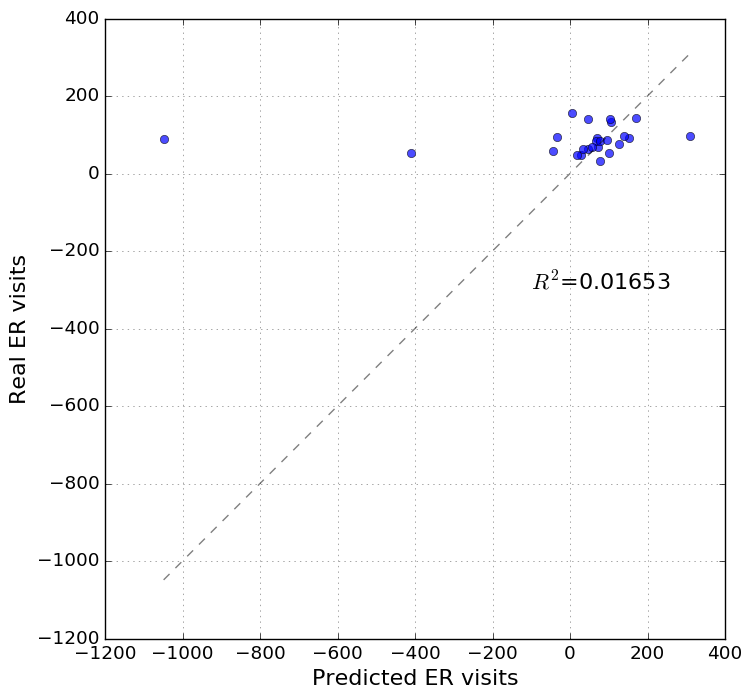

In [174]:
plt.figure(figsize=(8,8))

plt.plot(z_predict, z_real,'bo',alpha=0.7)
z= np.linspace(np.min(z_predict), np.max(z_predict),10)
plt.plot(z, z,'k--',alpha=0.5)
plt.xlabel('Predicted ER visits')
plt.ylabel('Real ER visits')


line= r'$R^2$=%.5f' % (r**2)
plt.text(80,-300,line,ha='center')

plt.savefig('RidgeRegression_CrossValidation.png')